# ABSA Date Regression

* Research for the question of how to handle the Multicollinearity Problems
* PCA is unsupervised method and PLS is supervised method.
* Lasso and Ridge both work for Multicollinearity Problems


### Merge the data into two clusters

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [92]:
austin_data = pd.read_csv('/Users/dongni/Desktop/ABSA_Austin.csv')

In [93]:
austin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24017 entries, 0 to 24016
Data columns (total 30 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Unnamed: 0                                  24017 non-null  int64  
 1   Unnamed: 0.1                                24017 non-null  int64  
 2   Unnamed: 0.1.1                              24017 non-null  int64  
 3   Unnamed: 0.1.1.1                            24017 non-null  int64  
 4   Unnamed: 0.1.1.1.1                          24017 non-null  int64  
 5   Unnamed: 0.1.1.1.1.1                        24017 non-null  int64  
 6   Unnamed: 0.1.1.1.1.1.1                      24017 non-null  int64  
 7   Unnamed: 0.1.1.1.1.1.1.1                    24017 non-null  int64  
 8   Unnamed: 0.1.1.1.1.1.1.1.1                  24017 non-null  int64  
 9   Unnamed: 0.1.1.1.1.1.1.1.1.1                24017 non-null  int64  
 10  Unnamed: 0

In [94]:
austin = austin_data.iloc[:,17:]

In [95]:
austin

,business_id,stars,city,food_pos,service_pos,price_pos,clean_pos,location_pos,food_neg,service_neg,price_neg,clean_neg,location_neg
0,NRPemqVb4qpWFF0Avq_6OQ,5.0,Austin,0.57,0.34,0.24,0.45,0.87,0.21,0.47,0.58,0.37,0.07
1,NRPemqVb4qpWFF0Avq_6OQ,5.0,Austin,0.99,1.00,0.98,0.97,0.92,0.00,0.00,0.01,0.01,0.02
2,NRPemqVb4qpWFF0Avq_6OQ,5.0,Austin,1.00,1.00,0.06,0.79,0.79,0.00,0.00,0.93,0.14,0.10
3,NRPemqVb4qpWFF0Avq_6OQ,5.0,Austin,1.00,1.00,0.87,0.74,0.88,0.00,0.00,0.11,0.20,0.07
4,NRPemqVb4qpWFF0Avq_6OQ,5.0,Austin,0.95,1.00,0.97,0.97,0.86,0.02,0.00,0.02,0.02,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24012,EaBDXdIQ_TeeUhn1Twnjvg,4.0,Austin,1.00,1.00,0.84,0.89,0.84,0.00,0.00,0.10,0.07,0.05
24013,EaBDXdIQ_TeeUhn1Twnjvg,4.0,Austin,0.97,1.00,0.98,0.99,1.00,0.00,0.00,0.01,0.00,0.00
24014,EaBDXdIQ_TeeUhn1Twnjvg,2.0,Austin,0.01,0.01,0.01,0.10,0.39,0.88,0.98,0.98,0.89,0.47
24015,EaBDXdIQ_TeeUhn1Twnjvg,1.0,Austin,0.01,0.01,0.01,0.02,0.11,0.89,0.98,0.98,0.96,0.80


In [96]:
austin = austin.groupby('business_id').mean()

In [97]:
austin['food'] = austin['food_pos'] - austin['food_neg']
austin['service'] = austin['service_pos'] - austin['service_neg']
austin['price'] = austin['price_pos'] - austin['price_neg']
austin['clean'] = austin['clean_pos'] - austin['clean_neg']
austin['location'] = austin['location_pos'] - austin['location_neg']

In [98]:
austin_change = austin.drop(columns = ['food_pos','service_pos','price_pos','clean_pos','location_pos','food_neg','service_neg','price_neg','clean_neg','location_neg'])

In [99]:
atlanta_data = pd.read_csv('/Users/dongni/Desktop/ABSA_Atlanta.csv')

In [100]:
atlanta = atlanta_data.iloc[:,2:]

In [101]:
atlanta = atlanta.groupby('business_id').mean()
atlanta['food'] = atlanta['food_pos'] - atlanta['food_neg']
atlanta['service'] = atlanta['service_pos'] - atlanta['service_neg']
atlanta['price'] = atlanta['price_pos'] - atlanta['price_neg']
atlanta['clean'] = atlanta['clean_pos'] - atlanta['clean_neg']
atlanta['location'] = atlanta['location_pos'] - atlanta['location_neg']

In [102]:
atlanta_change = atlanta.drop(columns = ['food_pos','service_pos','price_pos','clean_pos','location_pos','food_neg','service_neg','price_neg','clean_neg','location_neg'])

In [103]:
orlanda = pd.read_csv('/Users/dongni/Desktop/ABSA_Orlanda.csv')

In [104]:
orlanda = orlanda.groupby('business_id').mean()
orlanda['food'] = orlanda['food_pos'] - orlanda['food_neg']
orlanda['service'] = orlanda['service_pos'] - orlanda['service_neg']
orlanda['price'] = orlanda['price_pos'] - orlanda['price_neg']
orlanda['clean'] = orlanda['clean_pos'] - orlanda['clean_neg']
orlanda['location'] = orlanda['location_pos'] - orlanda['location_neg']

In [105]:
orlanda_change = orlanda.drop(columns = ['food_pos','service_pos','price_pos','clean_pos','location_pos','food_neg','service_neg','price_neg','clean_neg','location_neg'])

In [106]:
portland = pd.read_csv('/Users/dongni/Desktop/ABSA_Portland.csv')

In [107]:
portland = portland.groupby('business_id').mean()
portland['food'] = portland['food_pos'] - portland['food_neg']
portland['service'] = portland['service_pos'] - portland['service_neg']
portland['price'] = portland['price_pos'] - portland['price_neg']
portland['clean'] = portland['clean_pos'] - portland['clean_neg']
portland['location'] = portland['location_pos'] - portland['location_neg']

In [108]:
portland_change = portland.drop(columns = ['food_pos','service_pos','price_pos','clean_pos','location_pos','food_neg','service_neg','price_neg','clean_neg','location_neg'])

In [109]:
vancouver = pd.read_csv('/Users/dongni/Desktop/ABSA_Vancouver.csv')

In [110]:
vancouver = vancouver.iloc[:,2:]

In [111]:
vancouver = vancouver.groupby('business_id').mean()
vancouver['food'] = vancouver['food_pos'] - vancouver['food_neg']
vancouver['service'] = vancouver['service_pos'] - vancouver['service_neg']
vancouver['price'] = vancouver['price_pos'] - vancouver['price_neg']
vancouver['clean'] = vancouver['clean_pos'] - vancouver['clean_neg']
vancouver['location'] = vancouver['location_pos'] - vancouver['location_neg']

In [112]:
vancouver_change = vancouver.drop(columns = ['food_pos','service_pos','price_pos','clean_pos','location_pos','food_neg','service_neg','price_neg','clean_neg','location_neg'])

In [113]:
vancouver_change.shape

(2644, 6)

In [114]:
orlanda_change.shape

(2264, 6)

In [115]:
portland_change.shape

(2848, 6)

In [116]:
atlanta_change.shape

(2263, 6)

In [117]:
austin_change.shape

(2608, 6)

In [118]:
cluster_1 = pd.concat([portland_change,vancouver_change])
cluster_2 = pd.concat([austin_change,atlanta_change,orlanda_change])

### Calculate the VIF score to check whether have multicollinearity

In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [124]:
X_temp = cluster_1.drop(columns = ['stars'])
calc_vif(X_temp)

,variables,VIF
0,food,2.884770
1,service,5.483399
2,price,5.201140
3,clean,12.119186
4,location,5.320088


In [125]:
X_temp = cluster_2.drop(columns = ['stars'])
calc_vif(X_temp)

,variables,VIF
0,food,3.024215
1,service,6.419940
2,price,6.218933
3,clean,13.801034
4,location,5.666144


### Plot Heatmap

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

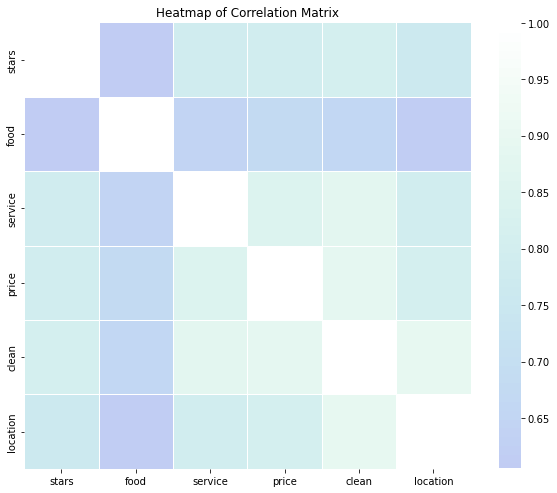

In [66]:
#Cluster I
corr_matrix = cluster_1.corr()
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220,10,as_cmap = True)

#Deep dive into diverging_pattern
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns.values,
           yticklabels=corr_matrix.columns.values, cmap="cubehelix", vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

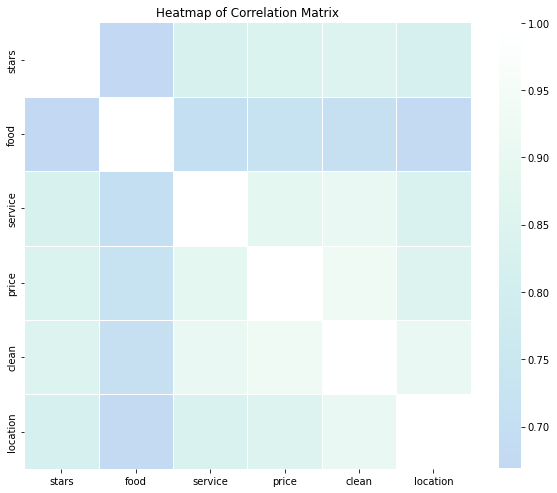

In [67]:
#Cluster II
corr_matrix = cluster_2.corr()
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220,10,as_cmap = True)

#Deep dive into diverging_pattern
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns.values,
           yticklabels=corr_matrix.columns.values, cmap="cubehelix", vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

## PLS

Partial least squares regression (PLS regression) is a statistical method that bears some relation to principal components regression.

In [69]:
cluster_1_pls = cluster_1.sample(n=200, replace=False, random_state=1)
cluster_2_pls = cluster_2.sample(n=200, replace=False, random_state=1)

In [70]:
X1,y1 = cluster_1_pls.drop(columns = ['stars']),cluster_1_pls['stars']
X2,y2 = cluster_2_pls.drop(columns = ['stars']),cluster_2_pls['stars']

#### use cv find best n_components

Text(0.5, 1.0, 'MSE vs. number of components')

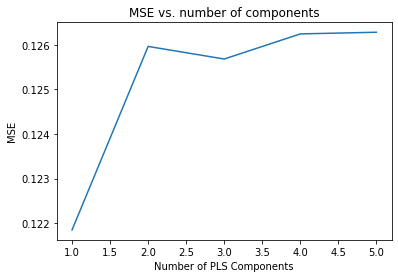

In [71]:
#define cross-validation method
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)

mse = []
n = len(X1)

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(PLSRegression(n_components=1),
           np.ones((n,1)), y1, cv=cv, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6): #maximun 6 because we total have 6 variables
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, scale(X1), y1, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(score)

#plot test MSE vs. number of components
plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('MSE vs. number of components')

Text(0.5, 1.0, 'MSE vs. number of components')

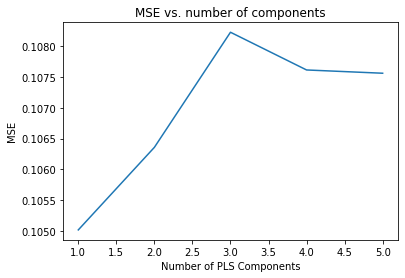

In [72]:
#define cross-validation method
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)

mse = []
n = len(X2)

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(PLSRegression(n_components=1),
           np.ones((n,1)), y2, cv=cv, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6): #maximun 6 because we total have 6 variables
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, scale(X2), y2, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(score)

#plot test MSE vs. number of components
plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('MSE vs. number of components')

Here we select k = 1 for the PLS n_components

In [77]:
X1,y1 = cluster_1.drop(columns = ['stars']),cluster_1['stars']
X2,y2 = cluster_2.drop(columns = ['stars']),cluster_2['stars']

In [78]:
train_X, test_X, train_y, test_y = train_test_split(X1,y1,train_size = 0.1,test_size=0.9,random_state=4)

In [79]:
pls2 = PLSRegression(n_components=1)
pls2.fit(train_X, train_y)
print(pls2.score(test_X, test_y))

0.6970435628336978


In [80]:
MSE_CV_scores = - cross_val_score(pls2, train_X, train_y, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 
print('CV scores average: ',np.sum(MSE_CV_scores)/10)
RMSE_CV = (MSE_CV_scores.mean())**(1/2)
print('CV RMSE: {:.4f}'.format(RMSE_CV))

y_pred_train = pls2.predict(train_X)
RMSE_train = (mean_squared_error(train_y, y_pred_train))**(1/2)
print('Train RMSE: {:.4f}'.format(RMSE_train))

pred_y = pls2.predict(test_X)
rmse_dt = mean_squared_error(test_y, pred_y)**(1/2)
print("Test set RMSE of dt: {:.4f}".format(rmse_dt))

CV scores average:  0.1096794162360746
CV RMSE: 0.3312
Train RMSE: 0.3298
Test set RMSE of dt: 0.3412


In [81]:
# The coefficients
print("Coefficients: \n", pls2.coef_)
# The mean squared error
print("Mean squared error: %.4f" % mean_squared_error(test_y, pred_y))
# The coefficient of determination: 1 is perfect prediction
print("R_Square: %.4f" % r2_score(test_y, pred_y))

Coefficients: 
 [[0.08073399]
 [0.10802668]
 [0.10649343]
 [0.11004252]
 [0.10421827]]
Mean squared error: 0.1164
R_Square: 0.6970


In [82]:
def vip(model):
  t = model.x_scores_
  w = model.x_weights_
  q = model.y_loadings_
  p, h = w.shape
  vips = np.zeros((p,))
  s = np.diag(t.T @ t @ q.T @ q).reshape(h, -1)
  total_s = np.sum(s)
  for i in range(p):
      weight = np.array([ (w[i,j] / np.linalg.norm(w[:,j]))**2 for j in range(h) ])
      vips[i] = np.sqrt(p*(s.T @ weight)/total_s)
  return vips

In [83]:
vip(pls2)

array([0.7878876 , 1.05423851, 1.03927545, 1.07391121, 1.01707204])

In [289]:
feature_list = ['food','sevice', 'price', 'clean', 'location']
importance = pls2.coef_

for i,v in zip(feature_list, importance):
    print('Feature:', i, ', Score: %.5f' % v)

Feature: food , Score: 0.01556
Feature: sevice , Score: 0.13761
Feature: price , Score: 0.11623
Feature: clean , Score: 0.11793
Feature: location , Score: 0.11130


In [84]:
train_X, test_X, train_y, test_y = train_test_split(X2,y2,train_size = 0.1,test_size=0.9,random_state=1)

In [85]:
pls2 = PLSRegression(n_components=1)
pls2.fit(train_X, train_y)
print(pls2.score(test_X, test_y))

0.757552939679184


In [292]:
MSE_CV_scores = - cross_val_score(pls2, train_X, train_y, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 
print('CV scores average: ',np.sum(MSE_CV_scores)/10)
RMSE_CV = (MSE_CV_scores.mean())**(1/2)
print('CV RMSE: {:.4f}'.format(RMSE_CV))

y_pred_train = pls2.predict(train_X)
RMSE_train = (mean_squared_error(train_y, y_pred_train))**(1/2)
print('Train RMSE: {:.4f}'.format(RMSE_train))

pred_y = pls2.predict(test_X)
rmse_dt = mean_squared_error(test_y, pred_y)**(1/2)
print("Test set RMSE of dt: {:.4f}".format(rmse_dt))

CV scores average:  0.11855066028466976
CV RMSE: 0.3443
Train RMSE: 0.3419
Test set RMSE of dt: 0.3449


In [293]:
# The coefficients
print("Coefficients: \n", pls2.coef_)
# The mean squared error
print("Mean squared error: %.4f" % mean_squared_error(test_y, pred_y))
# The coefficient of determination: 1 is perfect prediction
print("R_Square: %.4f" % r2_score(test_y, pred_y))

Coefficients: 
 [[0.03065157]
 [0.14357694]
 [0.15918183]
 [0.17541186]
 [0.14776705]]
Mean squared error: 0.1190
R_Square: 0.7605


## LSSAO and Ridge

In [294]:
import sklearn.metrics as metrics
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold 
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
alpha_vals = [0.001, 0.01, 0.1, 1, 10, 100, 1000 ]


## Choose a cross validation strategy. 

cv = KFold(n_splits=5, shuffle=True, random_state=1)

## setting param for param_grid in GridSearchCV. 
param = {'alpha': alpha_vals}

## Calling on GridSearchCV object. 
grid_lg = GridSearchCV(estimator=linear_model.Lasso(), 
                   param_grid = param,
                   scoring = 'neg_mean_squared_error',
                   n_jobs =-1,
                   cv = cv
)
## Fitting the model
grid_lg.fit(X1, y1)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='neg_mean_squared_error')

#### Here we use cv to find best alpha for lasso and ridge

In [295]:
print(grid_lg.best_score_)
print(grid_lg.best_params_)
print(grid_lg.best_estimator_)

-0.11376540769175306
{'alpha': 0.001}
Lasso(alpha=0.001)


In [296]:
from sklearn import linear_model
train_X, test_X, train_y, test_y = train_test_split(X1,y1,train_size = 0.7,test_size=0.3,random_state=1)
lasso = linear_model.Lasso(alpha=0.001)
lasso.fit(train_X, train_y)

Lasso(alpha=0.001)

In [298]:
MSE_CV_scores = - cross_val_score(lasso, train_X, train_y, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 
print('CV scores average: ',np.sum(MSE_CV_scores)/10)
RMSE_CV = (MSE_CV_scores.mean())**(1/2)
print('CV RMSE: {:.4f}'.format(RMSE_CV))

y_pred_train = lasso.predict(train_X)
RMSE_train = (mean_squared_error(train_y, y_pred_train))**(1/2)
print('Train RMSE: {:.4f}'.format(RMSE_train))

pred_y = lasso.predict(test_X)
rmse_dt = mean_squared_error(test_y, pred_y)**(1/2)
print("Test set RMSE of dt: {:.4f}".format(rmse_dt))

CV scores average:  0.11327450665435664
CV RMSE: 0.3366
Train RMSE: 0.3359
Test set RMSE of dt: 0.3388


In [299]:
# The coefficients
print("Coefficients: \n", lasso.coef_)
# The mean squared error
print("Mean squared error: %.4f" % mean_squared_error(test_y, pred_y))
# The coefficient of determination: 1 is perfect prediction
print("R_Square: %.4f" % r2_score(test_y, pred_y))

Coefficients: 
 [0.10667411 0.41979953 0.4870925  0.56049214 0.42016669]
Mean squared error: 0.1148
R_Square: 0.6845


In [300]:
from sklearn import linear_model
train_X, test_X, train_y, test_y = train_test_split(X2,y2,train_size = 0.7,test_size=0.3,random_state=1)
lasso = linear_model.Lasso(alpha=0.001)
lasso.fit(train_X, train_y)

Lasso(alpha=0.001)

In [301]:
MSE_CV_scores = - cross_val_score(lasso, train_X, train_y, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1)
                                  
print('CV scores average: ',np.sum(MSE_CV_scores)/10)
RMSE_CV = (MSE_CV_scores.mean())**(1/2)
print('CV RMSE: {:.2f}'.format(RMSE_CV))

y_pred_train = lasso.predict(train_X)
RMSE_train = (mean_squared_error(train_y, y_pred_train))**(1/2)
print('Train RMSE: {:.2f}'.format(RMSE_train))

pred_y = lasso.predict(test_X)
rmse_dt = mean_squared_error(test_y, pred_y)**(1/2)
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

CV scores average:  0.11756618474792917
CV RMSE: 0.34
Train RMSE: 0.34
Test set RMSE of dt: 0.35


In [303]:
# The coefficients
print("Coefficients: \n", lasso.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(test_y, pred_y))
# The coefficient of determination: 1 is perfect prediction
print("R_Square: %.4f" % r2_score(test_y, pred_y))

Coefficients: 
 [0.14086362 0.49304879 0.49776414 0.45151406 0.5784517 ]
Mean squared error: 0.12
R_Square: 0.7629


In [304]:
alpha_vals = [0.001, 0.01, 0.1, 1, 10, 100, 1000 ]


## Choose a cross validation strategy. 

cv = KFold(n_splits=5, shuffle=True, random_state=1)

## setting param for param_grid in GridSearchCV. 
param = {'alpha': alpha_vals}

## Calling on GridSearchCV object. 
grid_lg = GridSearchCV(estimator=Ridge(), 
                   param_grid = param,
                   scoring = 'neg_mean_squared_error',
                   n_jobs =-1,
                   cv = cv
)
## Fitting the model
grid_lg.fit(X1, y1)

print(grid_lg.best_score_)
print(grid_lg.best_params_)
print(grid_lg.best_estimator_)

-0.1137249097605502
{'alpha': 10}
Ridge(alpha=10)


In [305]:
from sklearn.linear_model import Ridge
train_X, test_X, train_y, test_y = train_test_split(X1,y1,train_size = 0.7,test_size=0.3,random_state=1)
ridge = Ridge(alpha=10)
ridge.fit(train_X, train_y)

Ridge(alpha=10)

In [307]:
MSE_CV_scores = - cross_val_score(ridge, train_X, train_y, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1)
                                  
print('CV scores average: ',np.sum(MSE_CV_scores)/10)
RMSE_CV = (MSE_CV_scores.mean())**(1/2)
print('CV RMSE: {:.4f}'.format(RMSE_CV))

y_pred_train = ridge.predict(train_X)
RMSE_train = (mean_squared_error(train_y, y_pred_train))**(1/2)
print('Train RMSE: {:.4f}'.format(RMSE_train))

pred_y = ridge.predict(test_X)
rmse_dt = mean_squared_error(test_y, pred_y)**(1/2)
print("Test set RMSE of dt: {:.4f}".format(rmse_dt))

CV scores average:  0.11322550734845922
CV RMSE: 0.3365
Train RMSE: 0.3359
Test set RMSE of dt: 0.3386


In [308]:
# The coefficients
print("Coefficients: \n", ridge.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(test_y, pred_y))
# The coefficient of determination: 1 is perfect prediction
print("R_Square: %.4f" % r2_score(test_y, pred_y))

Coefficients: 
 [0.12632675 0.42730273 0.48240151 0.53127944 0.4319718 ]
Mean squared error: 0.11
R_Square: 0.6848


In [309]:
train_X, test_X, train_y, test_y = train_test_split(X2,y2,train_size = 0.7,test_size=0.3,random_state=1)
ridge = Ridge(alpha=10)
ridge.fit(train_X, train_y)

Ridge(alpha=10)

In [310]:
MSE_CV_scores = - cross_val_score(ridge, train_X, train_y, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1)
                                  
print('CV scores average: ',np.sum(MSE_CV_scores)/10)
RMSE_CV = (MSE_CV_scores.mean())**(1/2)
print('CV RMSE: {:.2f}'.format(RMSE_CV))

y_pred_train = ridge.predict(train_X)
RMSE_train = (mean_squared_error(train_y, y_pred_train))**(1/2)
print('Train RMSE: {:.2f}'.format(RMSE_train))

pred_y = ridge.predict(test_X)
rmse_dt = mean_squared_error(test_y, pred_y)**(1/2)
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

CV scores average:  0.11755372252071745
CV RMSE: 0.34
Train RMSE: 0.34
Test set RMSE of dt: 0.35


In [312]:
# The coefficients
print("Coefficients: \n", ridge.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(test_y, pred_y))
# The coefficient of determination: 1 is perfect prediction
print("R_Square: %.4f" % r2_score(test_y, pred_y))

Coefficients: 
 [0.15861974 0.48861767 0.49028655 0.46597606 0.55840798]
Mean squared error: 0.12
R_Square: 0.7628


## PCR

In statistics, principal component regression (PCR) is a regression analysis technique that is based on principal component analysis (PCA).

In [313]:
from sklearn.model_selection import RepeatedKFold
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

Text(0.5, 1.0, 'hp')

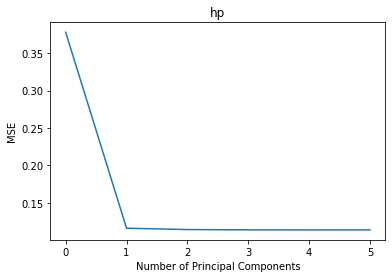

In [314]:
pca = PCA()
X_reduced = pca.fit_transform(scale(X1))

#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_reduced),1)), y1, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], y1, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('hp')

In [315]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 81.93,  91.18,  95.47,  98.5 , 100.  ])

In [316]:
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.3,random_state=0) 

#scale the training and testing data
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))[:,:1]

#train PCR model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:1], y_train)

#calculate RMSE
pred = regr.predict(X_reduced_test)
np.sqrt(mean_squared_error(y_test, pred))

0.34326753005400706

In [324]:
MSE_CV_scores = - cross_val_score(regr, X_reduced_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1)
                                  
print('CV scores average: ',np.sum(MSE_CV_scores)/10)
RMSE_CV = (MSE_CV_scores.mean())**(1/2)
print('CV RMSE: {:.4f}'.format(RMSE_CV))

X_reduced = pca.transform(scale(X_train))[:,:1]
y_pred_train = regr.predict(X_reduced)
RMSE_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print('Train RMSE: {:.4f}'.format(RMSE_train))

pred = regr.predict(X_reduced_test)
rmse_dt = np.sqrt(mean_squared_error(y_test, pred))
print("Test set RMSE of dt: {:.4f}".format(rmse_dt))

CV scores average:  0.1134121652492889
CV RMSE: 0.3368
Train RMSE: 0.3401
Test set RMSE of dt: 0.3433


In [325]:
print("R_Square: %.4f" % r2_score(y_test, pred))

R_Square: 0.6687


Text(0.5, 1.0, 'hp')

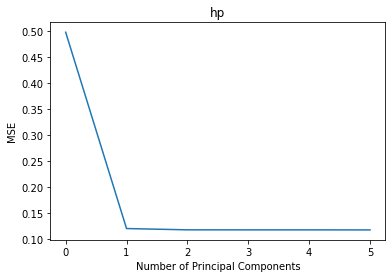

In [212]:
pca = PCA()
X_reduced = pca.fit_transform(scale(X2))

#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_reduced),1)), y2, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], y2, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('hp')

In [326]:
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X2,y2,test_size=0.3,random_state=0) 

#scale the training and testing data
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))[:,:1]

#train PCR model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:1], y_train)

#calculate RMSE
pred = regr.predict(X_reduced_test)
np.sqrt(mean_squared_error(y_test, pred))

0.34320569380194105

In [327]:
print("R_Square: %.4f" % r2_score(y_test, pred))

R_Square: 0.7618


## Decision Tree

Desicion trees make no assumptions on relationships between features. It just constructs splits on single features that improves classification, based on an impurity measure like Gini or entropy. If features A, B are heavily correlated, no /little information can be gained from splitting on B after having split on A. So it would typically get ignored in favor of C.

Of course a single decision tree is very vulnerable to overfitting, so one must either limit depth, prune heavily or preferly average many using an ensemble. Such problems get worse with many features and possibly also with co-variance but this problem occurs independently from multicolinearity.

In [87]:
cluster_1['stars'] = round(cluster_1['stars'])
cluster_2['stars'] = round(cluster_2['stars'])

In [36]:
X,y = cluster_1.drop(columns = ['stars']),cluster_1['stars']
train_X, test_X, train_y, test_y = train_test_split(X,y,train_size = 0.7,test_size=0.3,random_state=1)

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=5)
decision_tree = decision_tree.fit(train_X, train_y)

In [384]:
MSE_CV_scores = - cross_val_score(decision_tree, train_X, train_y, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 
print('CV scores average: ',np.sum(MSE_CV_scores)/10)
RMSE_CV = (MSE_CV_scores.mean())**(1/2)
print('CV RMSE: {:.4f}'.format(RMSE_CV))

y_pred_train = decision_tree.predict(train_X)
RMSE_train = (mean_squared_error(train_y, y_pred_train))**(1/2)
print('Train RMSE: {:.4f}'.format(RMSE_train))

pred_y = decision_tree.predict(test_X)
rmse_dt = mean_squared_error(test_y, pred_y)**(1/2)
print("Test set RMSE of dt: {:.4f}".format(rmse_dt))

CV scores average:  0.24921739718614724
CV RMSE: 0.4992
Train RMSE: 0.4638
Test set RMSE of dt: 0.4994


In [385]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(test_y, pred_y))
# The coefficient of determination: 1 is perfect prediction
print("R_Square: %.4f" % r2_score(test_y, pred_y))

Mean squared error: 0.25
R_Square: 0.4598


In [346]:
decision_tree.feature_importances_

array([0.0547591 , 0.03011036, 0.33265883, 0.54227723, 0.04019449])

In [347]:
r = export_text(decision_tree, feature_names=['food','service','price','clean','location'])
print(r)

|--- clean <= 0.02
|   |--- price <= -0.46
|   |   |--- location <= -0.04
|   |   |   |--- food <= 0.20
|   |   |   |   |--- service <= -0.20
|   |   |   |   |   |--- class: 2.0
|   |   |   |   |--- service >  -0.20
|   |   |   |   |   |--- class: 3.0
|   |   |   |--- food >  0.20
|   |   |   |   |--- class: 3.0
|   |   |--- location >  -0.04
|   |   |   |--- food <= -0.34
|   |   |   |   |--- location <= 0.24
|   |   |   |   |   |--- class: 2.0
|   |   |   |   |--- location >  0.24
|   |   |   |   |   |--- class: 4.0
|   |   |   |--- food >  -0.34
|   |   |   |   |--- location <= 0.12
|   |   |   |   |   |--- class: 3.0
|   |   |   |   |--- location >  0.12
|   |   |   |   |   |--- class: 3.0
|   |--- price >  -0.46
|   |   |--- clean <= -0.09
|   |   |   |--- location <= 0.04
|   |   |   |   |--- price <= -0.35
|   |   |   |   |   |--- class: 3.0
|   |   |   |   |--- price >  -0.35
|   |   |   |   |   |--- class: 3.0
|   |   |   |--- location >  0.04
|   |   |   |   |--- food <= 0.18

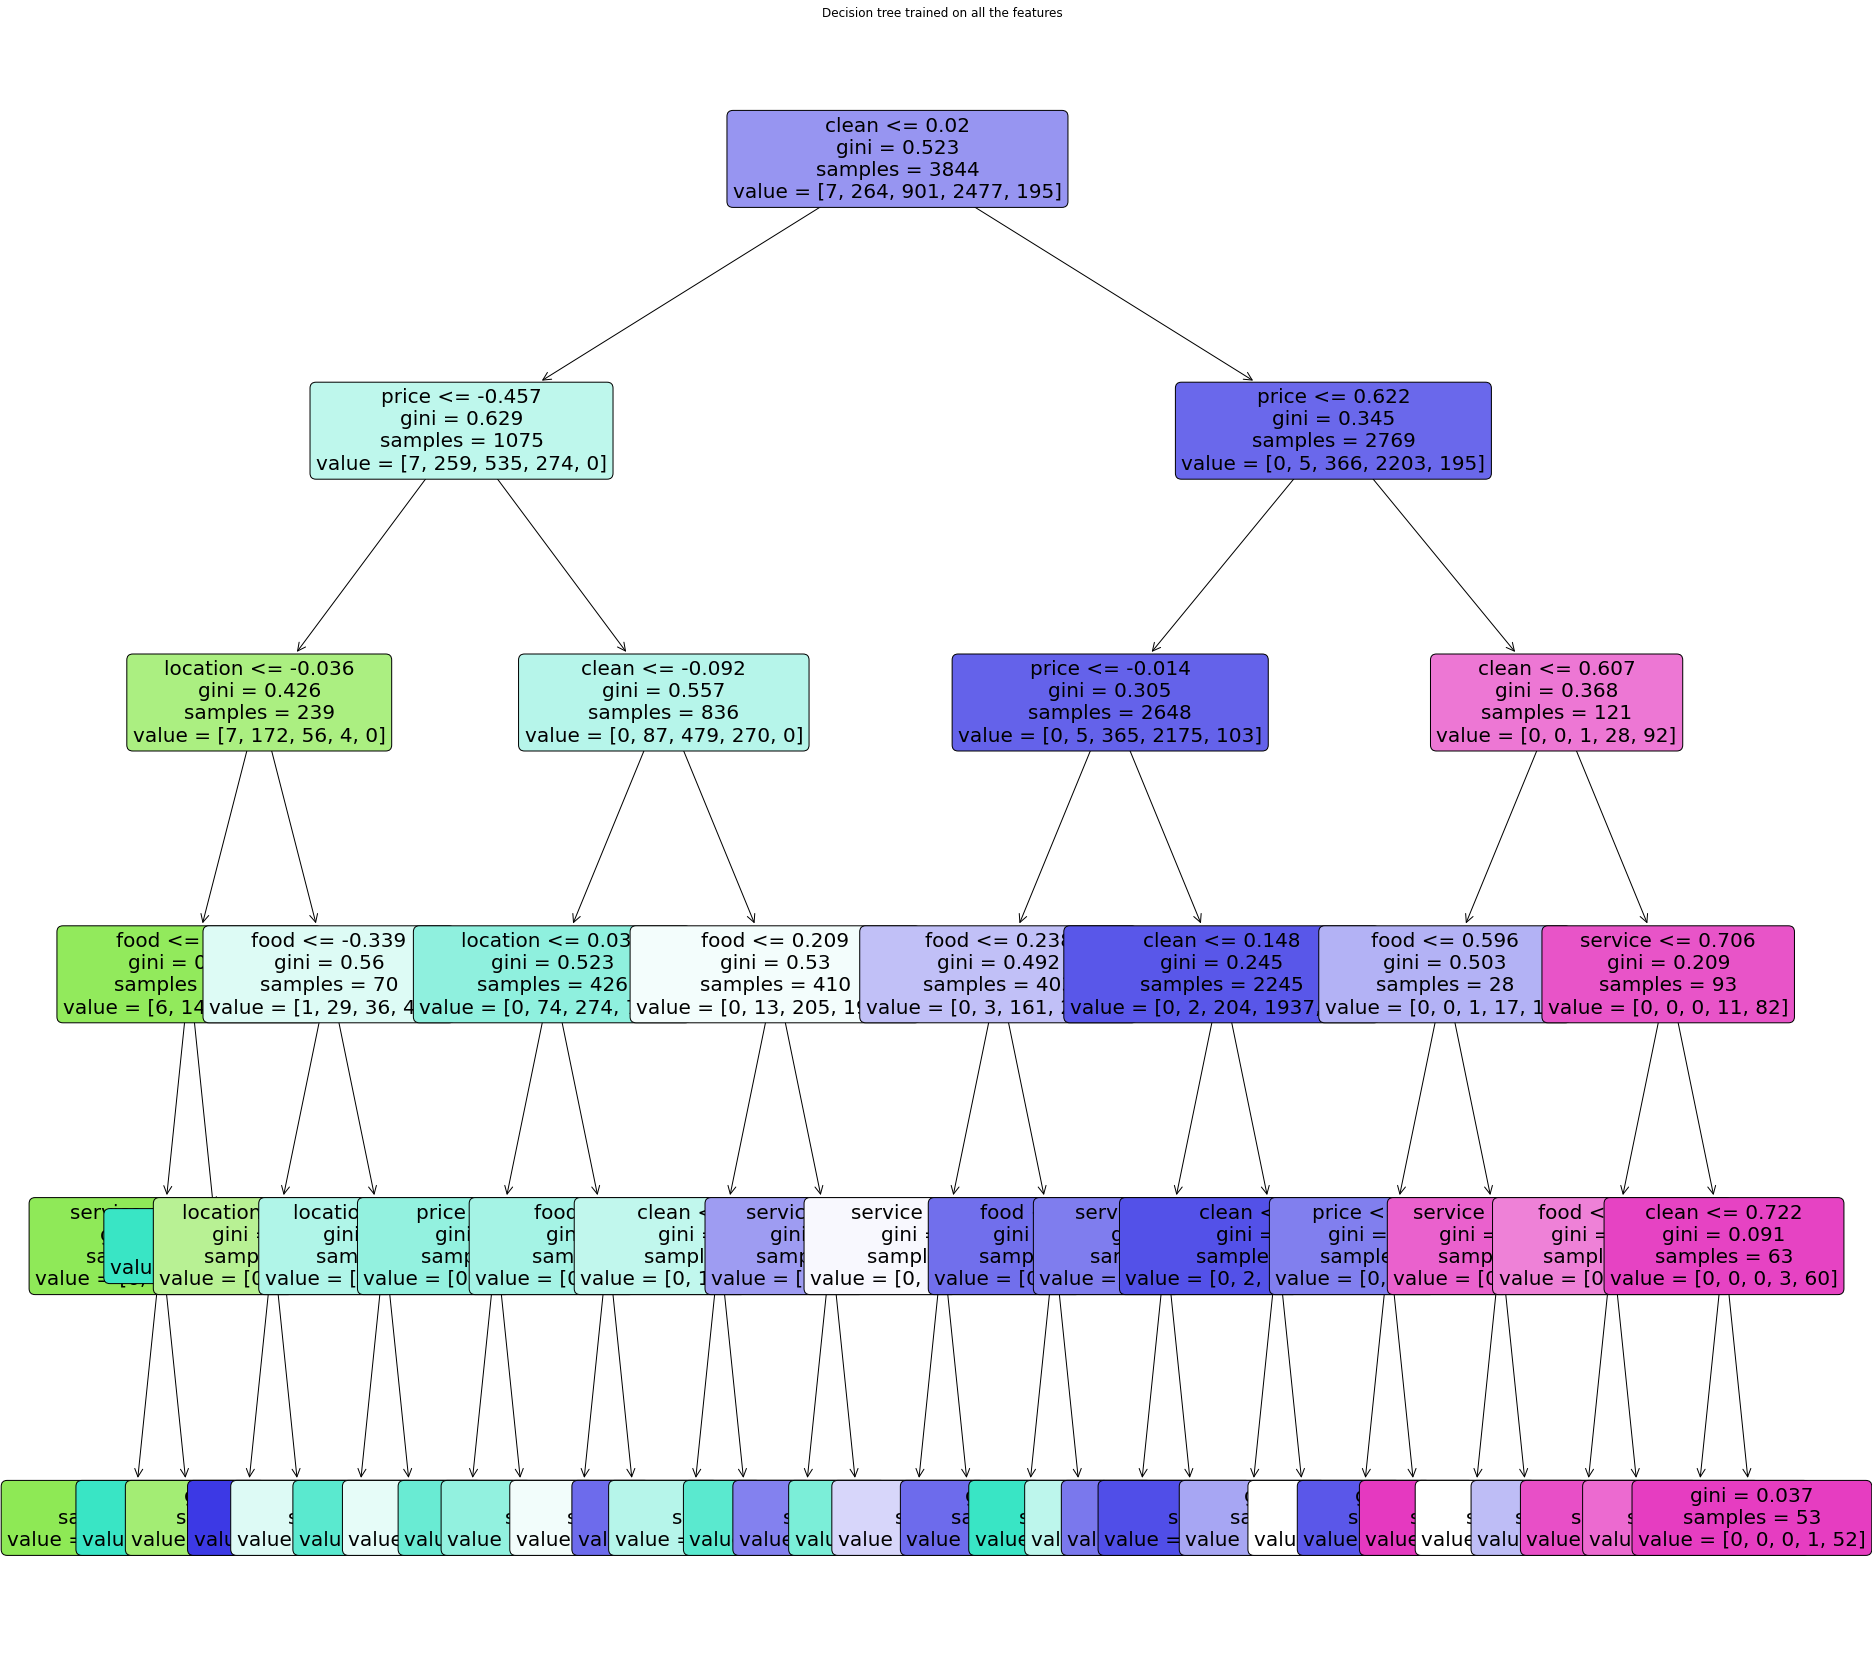

In [348]:
from sklearn import tree
from matplotlib import pyplot as plt
plt.figure(figsize=(30,30))
tree.plot_tree(decision_tree,
                feature_names = X.columns,
                filled=True,
                rounded=True, fontsize=20)
plt.title("Decision tree trained on all the features")
plt.show()

In [38]:
cluster_2['stars'] = round(cluster_2['stars'])
X,y = cluster_2.drop(columns = ['stars']),cluster_2['stars']
train_X, test_X, train_y, test_y = train_test_split(X,y,train_size = 0.7,test_size=0.3,random_state=1)
decision_tree = DecisionTreeClassifier(random_state=0, max_depth= 5)
decision_tree = decision_tree.fit(X, y)

In [380]:
MSE_CV_scores = - cross_val_score(decision_tree, train_X, train_y, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 
print('CV scores average: ',np.sum(MSE_CV_scores)/10)
RMSE_CV = (MSE_CV_scores.mean())**(1/2)
print('CV RMSE: {:.4f}'.format(RMSE_CV))

y_pred_train = decision_tree.predict(train_X)
RMSE_train = (mean_squared_error(train_y, y_pred_train))**(1/2)
print('Train RMSE: {:.4f}'.format(RMSE_train))

pred_y = decision_tree.predict(test_X)
rmse_dt = mean_squared_error(test_y, pred_y)**(1/2)
print("Test set RMSE of dt: {:.4f}".format(rmse_dt))

CV scores average:  0.23848577154308614
CV RMSE: 0.4884
Train RMSE: 0.4674
Test set RMSE of dt: 0.4660


In [381]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(test_y, pred_y))
# The coefficient of determination: 1 is perfect prediction
print("R_Square: %.4f" % r2_score(test_y, pred_y))

Mean squared error: 0.22
R_Square: 0.6446


#### Some basic information of the dataset

In [392]:
cluster_1[cluster_1['stars'] == 4.0]['food'].describe()

count    3535.000000
mean        0.296409
std         0.239482
min        -0.773750
25%         0.151000
50%         0.313333
75%         0.467000
max         0.970000
Name: food, dtype: float64

In [393]:
cluster_1[cluster_1['stars'] == 4.0]['service'].describe()

count    3535.000000
mean        0.219538
std         0.216761
min        -0.645714
25%         0.075556
50%         0.225000
75%         0.368466
max         0.908889
Name: service, dtype: float64

In [394]:
cluster_1[cluster_1['stars'] == 4.0]['price'].describe()

count    3535.000000
mean        0.172080
std         0.213828
min        -0.717778
25%         0.036307
50%         0.181250
75%         0.316667
max         0.882857
Name: price, dtype: float64

In [395]:
cluster_1[cluster_1['stars'] == 4.0]['location'].describe()

count    3535.000000
mean        0.340835
std         0.141675
min        -0.321429
25%         0.250000
50%         0.341667
75%         0.436667
max         0.841111
Name: location, dtype: float64

In [396]:
cluster_1[cluster_1['stars'] == 4.0]['clean'].describe()

count    3535.000000
mean        0.244781
std         0.184661
min        -0.522857
25%         0.123542
50%         0.247778
75%         0.370000
max         0.913333
Name: clean, dtype: float64

In [88]:
cluster_1[cluster_1['stars'] == 3.0]['food'].describe()

count    1305.000000
mean        0.068278
std         0.237528
min        -0.756000
25%        -0.090000
50%         0.064286
75%         0.221111
max         0.926250
Name: food, dtype: float64

In [89]:
cluster_1[cluster_1['stars'] == 3.0]['clean'].describe()

count    1305.000000
mean       -0.030990
std         0.195171
min        -0.624444
25%        -0.166250
50%        -0.030000
75%         0.097778
max         0.627143
Name: clean, dtype: float64

In [90]:
cluster_1[cluster_1['stars'] == 3.0]['service'].describe()

count    1305.000000
mean       -0.086484
std         0.235894
min        -0.702857
25%        -0.256000
50%        -0.083333
75%         0.068889
max         0.614444
Name: service, dtype: float64

In [401]:
cluster_2[cluster_2['stars'] == 4.0]['location'].describe()

count    4411.000000
mean        0.331425
std         0.139635
min        -0.183333
25%         0.240000
50%         0.337778
75%         0.423636
max         0.888750
Name: location, dtype: float64

In [402]:
cluster_2[cluster_2['stars'] == 4.0]['price'].describe()

count    4411.000000
mean        0.151171
std         0.211614
min        -0.568889
25%         0.013693
50%         0.156667
75%         0.293000
max         0.898333
Name: price, dtype: float64

In [39]:
cluster_1.groupby(['stars']).count()

,food,service,price,clean,location
stars,,,,,
1.0,13,13,13,13,13
2.0,365,365,365,365,365
3.0,1305,1305,1305,1305,1305
4.0,3535,3535,3535,3535,3535
5.0,274,274,274,274,274


In [40]:
cluster_2.groupby(['stars']).count()

,food,service,price,clean,location
stars,,,,,
1.0,47,47,47,47,47
2.0,852,852,852,852,852
3.0,1537,1537,1537,1537,1537
4.0,4411,4411,4411,4411,4411
5.0,288,288,288,288,288


## Reference

* https://www.statology.org/partial-least-squares-in-python/
* https://www.statology.org/principal-components-regression-in-python/